In [ ]:
# Install dependencies
!pip install scikit-learn pandas numpy matplotlib nltk seaborn


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Load datasets (update path if needed)
fake_df = pd.read_csv("/content/drive/MyDrive/Fake.csv")
true_df = pd.read_csv("/content/drive/MyDrive/True.csv")
fake_df.head()
true_df.head()

# Add labels
fake_df["label"] = 0  # Fake
true_df["label"] = 1  # True

# Combine and shuffle
df = pd.concat([fake_df, true_df], axis=0)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Combine title and text into one field
df["content"] = df["title"].astype(str) + " " + df["text"].astype(str)

print(df.head())


                                               title  \
0  Ben Stein Calls Out 9th Circuit Court: Committ...   
1  Trump drops Steve Bannon from National Securit...   
2  Puerto Rico expects U.S. to lift Jones Act shi...   
3   OOPS: Trump Just Accidentally Confirmed He Le...   
4  Donald Trump heads for Scotland to reopen a go...   

                                                text       subject  \
0  21st Century Wire says Ben Stein, reputable pr...       US_News   
1  WASHINGTON (Reuters) - U.S. President Donald T...  politicsNews   
2  (Reuters) - Puerto Rico Governor Ricardo Rosse...  politicsNews   
3  On Monday, Donald Trump once again embarrassed...          News   
4  GLASGOW, Scotland (Reuters) - Most U.S. presid...  politicsNews   

                  date  label  \
0    February 13, 2017      0   
1       April 5, 2017       1   
2  September 27, 2017       1   
3         May 22, 2017      0   
4       June 24, 2016       1   

                                           

In [ ]:
stop_words = set(stopwords.words("english"))
stemmer = PorterStemmer()

def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans("", "", string.punctuation))
    words = [stemmer.stem(word) for word in text.split() if word not in stop_words]
    return " ".join(words)

# Apply cleaning
df["content"] = df["content"].apply(clean_text)


In [ ]:
X = df["content"]
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
vectorizer = TfidfVectorizer(max_df=0.7, ngram_range=(1,2))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [ ]:
model = LogisticRegression(max_iter=2000, C=2, solver="lbfgs")
model.fit(X_train_vec, y_train)


LogisticRegression(C=2, max_iter=2000)

🚀 Model Accuracy: 98.90%

              precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      4710
        True       0.98      0.99      0.99      4270

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



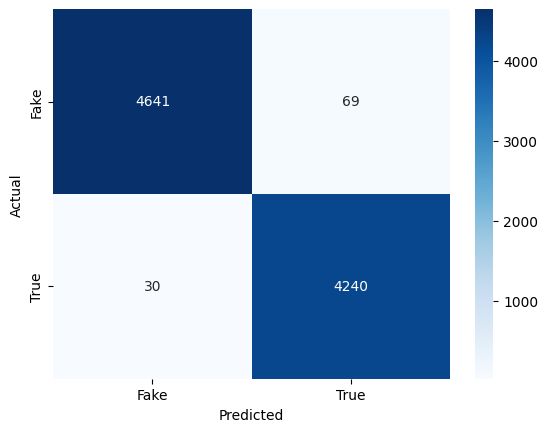

In [ ]:
y_pred = model.predict(X_test_vec)

accuracy = accuracy_score(y_test, y_pred)
print(f"🚀 Model Accuracy: {accuracy * 100:.2f}%\n")
print(classification_report(y_test, y_pred, target_names=["Fake", "True"]))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Fake", "True"], yticklabels=["Fake", "True"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
while True:
    user_input = input("\nEnter a news article (or type 'exit' to quit): ")
    if user_input.lower() == "exit":
        break
    cleaned_input = clean_text(user_input)
    user_vec = vectorizer.transform([cleaned_input])
    prediction = model.predict(user_vec)[0]
    if prediction == 0:
        print("🚨 The news is likely FAKE.")
    else:
        print("✅ The news is likely REAL.")



Enter a news article (or type 'exit' to quit): Aadi Ther festival of Azhagarkoil draws devotees from across Madurai
🚨 The news is likely FAKE.

Enter a news article (or type 'exit' to quit): India’s trade deficit narrowed in April-July as services continued to drive export growth: Govt. data
✅ The news is likely REAL.

Enter a news article (or type 'exit' to quit): Aadi Ther festival of Azhagarkoil draws devotees from across Madurai The Hindu Bureau
🚨 The news is likely FAKE.

Enter a news article (or type 'exit' to quit): Protesters march in Kargil over Statehood, Sixth Schedule
🚨 The news is likely FAKE.

Enter a news article (or type 'exit' to quit): exit
